In [1]:
import pandas as pd
from random import random as rng
from matplotlib import pyplot as plt

def roll_rng(df):
    rn = rng()
    for i, row in df.iterrows():
        if rn <= row['cumsum']:
            return row.name

#### CDD Drop Rate

In [2]:
df_cdd = pd.read_csv('./assets/cdd_drop_rate.csv', header=None)
df_cdd.columns = ['drop']
df_cdd['drop'].value_counts()

3    133
5     64
7     27
Name: drop, dtype: int64

In [3]:
df_cdd['drop'].value_counts() / len(df_cdd)

3    0.593750
5    0.285714
7    0.120536
Name: drop, dtype: float64

In [4]:
df_cdd_drop_rate = pd.DataFrame(df_cdd['drop'].value_counts() / len(df_cdd)).sort_index()
df_cdd_drop_rate['cumsum'] = df_cdd_drop_rate['drop'].cumsum()
df_cdd_drop_rate

,drop,cumsum
3,0.593750,0.593750
5,0.285714,0.879464
7,0.120536,1.000000


#### Raw Crystal Drop Rate

In [5]:
df_raw = pd.read_csv('./assets/raw_crystal_drop_rate.csv', header=None)
df_raw.columns = ['drop']
df_raw['drop'].value_counts().sort_values() / len(df_raw)

30    0.0625
80    0.0625
20    0.1250
70    0.1875
50    0.2500
60    0.3125
Name: drop, dtype: float64

<BarContainer object of 6 artists>

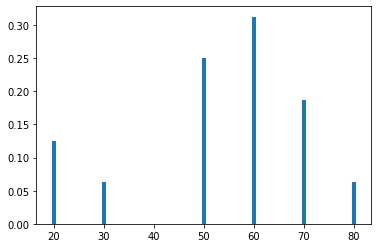

In [6]:
dist = df_raw['drop'].value_counts() / len(df_raw)
plt.bar(dist.index, dist.values)

In [7]:
df_raw_extract_rate = pd.DataFrame(df_raw['drop'].value_counts() / len(df_raw)).sort_index()
df_raw_extract_rate['cumsum'] = df_raw_extract_rate['drop'].cumsum()
df_raw_extract_rate

,drop,cumsum
20,0.1250,0.1250
30,0.0625,0.1875
50,0.2500,0.4375
60,0.3125,0.7500
70,0.1875,0.9375
80,0.0625,1.0000


In [8]:
RAW_CRYSTAL_DROP_RATE = 16/231
FODDER_COST = 500_000_000

In [9]:
class Mastercraft:
    def __init__(self, success_rate=0.02):
        self.fail_count = 0
        self.attempt = 0
        self.fodder = 0
        self.success_rate = success_rate
        self.mesos = 0
        self.success = False
    
    def roll_rng(self):
        rn = rng()
        if rn < self.success_rate:
            return True
        return False
    
    def necro_conversion(self):
        # make ancient stone 
        self.mesos += 15_000_000
        
        if self.fail_count == 3:
            self.fail_count -= 1
            self.fodder += 1
            self.mesos += FODDER_COST
            self.mesos += 10_000_000
        
        self.success = self.roll_rng()
        if not self.success:
            self.fail_count += 1
            
        self.mesos += 85_000_000
        self.attempt += 1

In [10]:
trial = 10000
import numpy as np
attemtps = np.zeros(trial)

for i in range(trial):
    mastercraft = Mastercraft(success_rate=0.04)
    while not mastercraft.success:
        mastercraft.necro_conversion()
    attemtps[i] = mastercraft.attempt
    
np.mean(attemtps)

24.8193

In [11]:
gear_probs = [0.04, 0.04, 0.04, 0.04, 0.04, 0.02]

trial = 100

attempt_arr = np.zeros(trial)
mesos_arr = np.zeros(trial)
fodder_arr = np.zeros(trial)
cdd_arr = np.zeros(trial)
crystal_arr = np.zeros(trial)
for i in range(trial):
    print(f"trial {i}", end='\r')
    crystal_pieces = 0
    ancient_crystal = 0
    attempt = 0
    mesos = 0
    fodder = 0
    cdd_run = 0

    for gear in gear_probs:
        mastercraft = Mastercraft(success_rate=gear)
        while not mastercraft.success:
            while crystal_pieces < 150:
                crystal_pieces += roll_rng(df_cdd_drop_rate)
                if rng() < RAW_CRYSTAL_DROP_RATE:
                    crystal_pieces += roll_rng(df_raw_extract_rate)
                    ancient_crystal += 1
                cdd_run += 1

            mastercraft.necro_conversion()
            crystal_pieces -= 150
        attempt += mastercraft.attempt
        mesos += mastercraft.mesos
        fodder += mastercraft.fodder

    crystal = cdd_run * 35 / 39 * 150
    
    attempt_arr[i] = attempt
    mesos_arr[i] = mesos
    fodder_arr[i] = fodder
    cdd_arr[i] = cdd_run
    crystal_arr[i] = crystal

(array([1.01394170e-04, 3.67553866e-04, 3.04182510e-04, 1.77439797e-04,
        1.14068441e-04, 1.14068441e-04, 3.80228137e-05, 2.53485425e-05,
        0.00000000e+00, 2.53485425e-05]),
 array([1151., 1940., 2729., 3518., 4307., 5096., 5885., 6674., 7463.,
        8252., 9041.]),
 <a list of 10 Patch objects>)

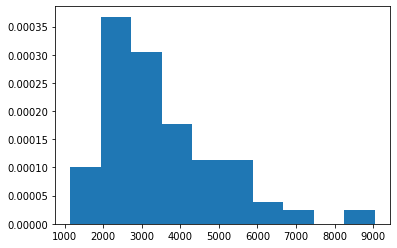

In [12]:
plt.hist(cdd_arr, density=True)

(array([0.00193237, 0.00652174, 0.00603865, 0.00386473, 0.00217391,
        0.00193237, 0.00072464, 0.00048309, 0.        , 0.00048309]),
 array([ 57. ,  98.4, 139.8, 181.2, 222.6, 264. , 305.4, 346.8, 388.2,
        429.6, 471. ]),
 <a list of 10 Patch objects>)

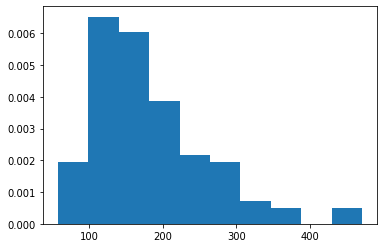

In [13]:
plt.hist(attempt_arr, density=True)

(array([0.00318066, 0.01113232, 0.00993957, 0.00556616, 0.00397583,
        0.00318066, 0.00119275, 0.00079517, 0.        , 0.00079517]),
 array([ 26.61 ,  51.762,  76.914, 102.066, 127.218, 152.37 , 177.522,
        202.674, 227.826, 252.978, 278.13 ]),
 <a list of 10 Patch objects>)

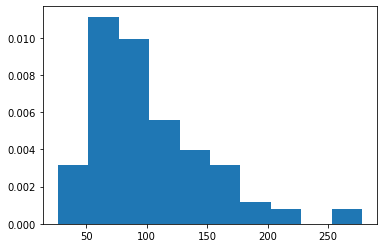

In [15]:
plt.hist(mesos_arr/1e9, density=True)